Machine Learning on Datasets

In [1]:
#Importing libraries

#there are a bunch of sun-libraries that will also be imported over here instead
#of being imported randomly throughout the cooding experience
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
from matplotlib import pyplot as plt # type: ignore 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

Reading the data

In [2]:
data=pd.read_csv('IRIS.csv')

Doing basic functions on the data

In [3]:
data.describe()
#gives basic understanding of the dataset

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
data.info()

#NOTE: there exists 2 columns
#1) ID column that needs to be dropped because of its increasing numeric value
#2) Species column that contains object which should be label encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.size
#displays the total amount entries in every column included.

900

In [6]:
data.shape
#tells us the division of rows and columns of the table
#i.e. 6 features with 150 rows of entries

(150, 6)

In [7]:
data["Species"].value_counts()
#displays all the values on different species

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [8]:
data.isna().sum()
#checks the total number of NaN values
#consists 0 therefore no cleaning required

ID              0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [9]:
data.isnull().sum()
#checks the total number of NULL values
#consists 0 therefore no cleaning required

ID              0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [10]:
data.duplicated().sum()
#checks for number of duplicates in the dataset

np.int64(0)

In [11]:
data.drop_duplicates(inplace=True)
#removes that duplicate from the dataset

In [12]:
data.duplicated().sum()
#checking if the duplicate still exists

np.int64(0)

Encoding Data

In [13]:
label_encoder=LabelEncoder()
#defining function

In [14]:
data['Species'] = label_encoder.fit_transform(data['Species'])
#encoding the label column for model training and fitting

In [15]:
data.head()
#checking if it worked

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [16]:
data=data.drop(columns=['ID'])
#droping the ID column as it is not usefull

In [17]:
data_plotting=data.drop(columns=['Species'])
#making a variable just to see the scatter plot without the species

<Axes: >

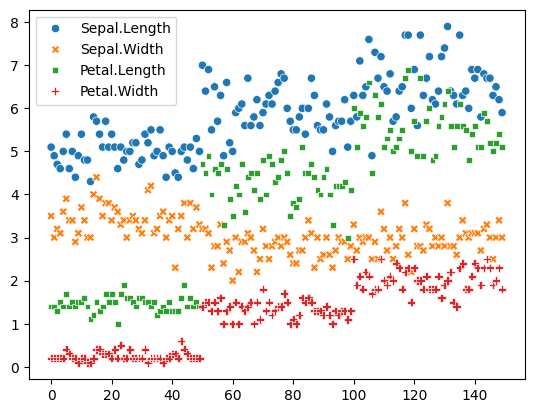

In [18]:
sns.scatterplot(data=data_plotting)

#plotting the data once for better visualisation of our work

Outlier checking and removal

NOTE: there will be some outliars still and we need to accept them because they cannot be filtered no matter what...

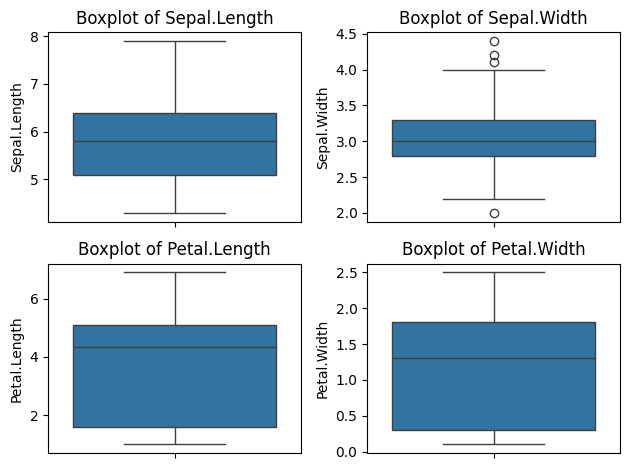

In [19]:
for i,col in enumerate(['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [20]:
#here we see only Sepal.width have some outliers, but the count is very small
#so we will ignore the outliars.

Applying Logistic Regression

In [21]:
model=LogisticRegression()

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(data[['Sepal.Length']], data['Sepal.Width'],test_size=0.2)

In [23]:
#i still have to write this code 

Plotting Data

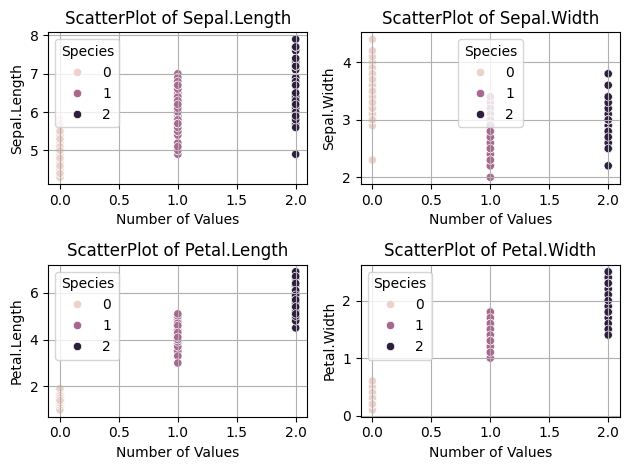

In [24]:
for i, col in enumerate(data.columns[:-1]):  # Exclude the 'species' column
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(y=data[col], x=data['Species'],hue=data['Species'],)
    plt.title(f'ScatterPlot of {col}')
    plt.ylabel(col)
    plt.xlabel('Number of Values')
    plt.grid(axis='both')
    plt.tight_layout()
    


<Axes: xlabel='Sepal.Length', ylabel='Sepal.Width'>

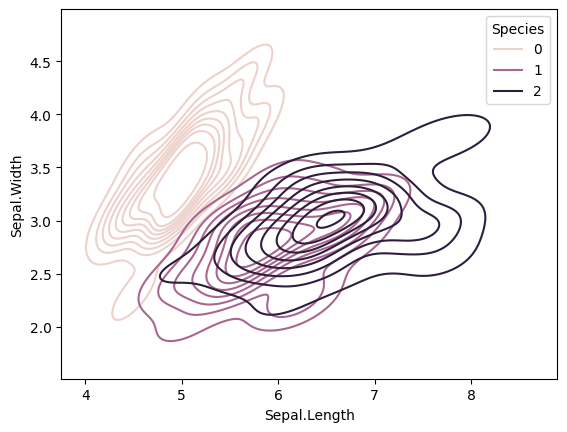

In [25]:
sns.kdeplot(data=data, x='Sepal.Length', y='Sepal.Width', hue='Species')